# Data Understanding and Cleaning

In [680]:
#Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [681]:
#Read Data from train csv
HousePrice = pd.read_csv("train.csv")
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [682]:
HousePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [683]:
#Drop the Columns which have higher number  of missing values
HousePrice.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'],axis=1,inplace=True)

In [684]:
#Extract the percentage of missing values
null = pd.DataFrame(round(HousePrice.isnull().sum()/len(HousePrice.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
MasVnrType,59.73
LotFrontage,17.74
GarageCond,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageType,5.55
BsmtFinType2,2.60
BsmtExposure,2.60


In [685]:
#Extract numeric columns
Numeric_Columns=HousePrice.select_dtypes(exclude='object').columns

In [686]:
#Extract Categorical  columns
Categorical_Col=HousePrice.select_dtypes(include='object').columns

In [687]:

HousePrice.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [688]:
#Replace LotFrontage  missing values 
HousePrice['LotFrontage'].fillna((HousePrice['LotFrontage'].median()), inplace=True)

In [689]:
HousePrice.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4


In [690]:
#Replace GarageYrBlt Missing Values
HousePrice['GarageYrBlt'] = HousePrice['GarageYrBlt'].fillna(HousePrice['GarageYrBlt'].median())


In [691]:
HousePrice.MasVnrArea.value_counts()

MasVnrArea
0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0    

In [692]:
#Replace MasVnrArea Missing Values
HousePrice['MasVnrArea'].fillna((HousePrice['MasVnrArea'].median()), inplace=True)

In [693]:
#Replace Categorical variables missing values
for col in Categorical_Col:
    HousePrice[col].fillna(HousePrice[col].mode()[0],inplace=True)

In [694]:
HousePrice[Categorical_Col].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [695]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [696]:
HousePrice.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [697]:
HousePrice.shape

(1460, 75)

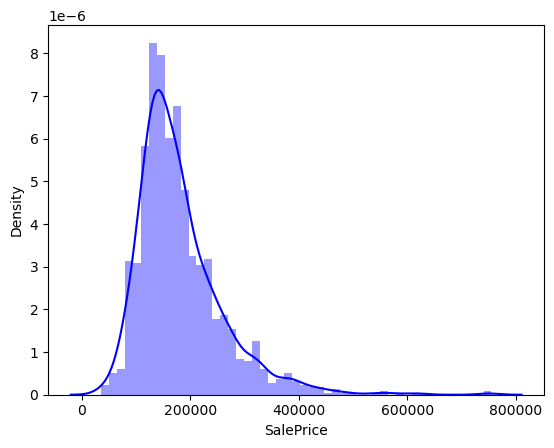

In [698]:
#Check for Skewness in Output Variable
plt.figure()
sns.distplot(HousePrice['SalePrice'],color='b')
plt.show()

In [699]:
# IQR to remove the outlier

Q1 = HousePrice[Numeric_Columns].quantile(0.05)
Q3 = HousePrice[Numeric_Columns].quantile(0.95)
IQR = Q3 - Q1

HousePrice = HousePrice[~((HousePrice[Numeric_Columns] < (Q1 - 1.5 * IQR)) |(HousePrice[Numeric_Columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data Exploration 

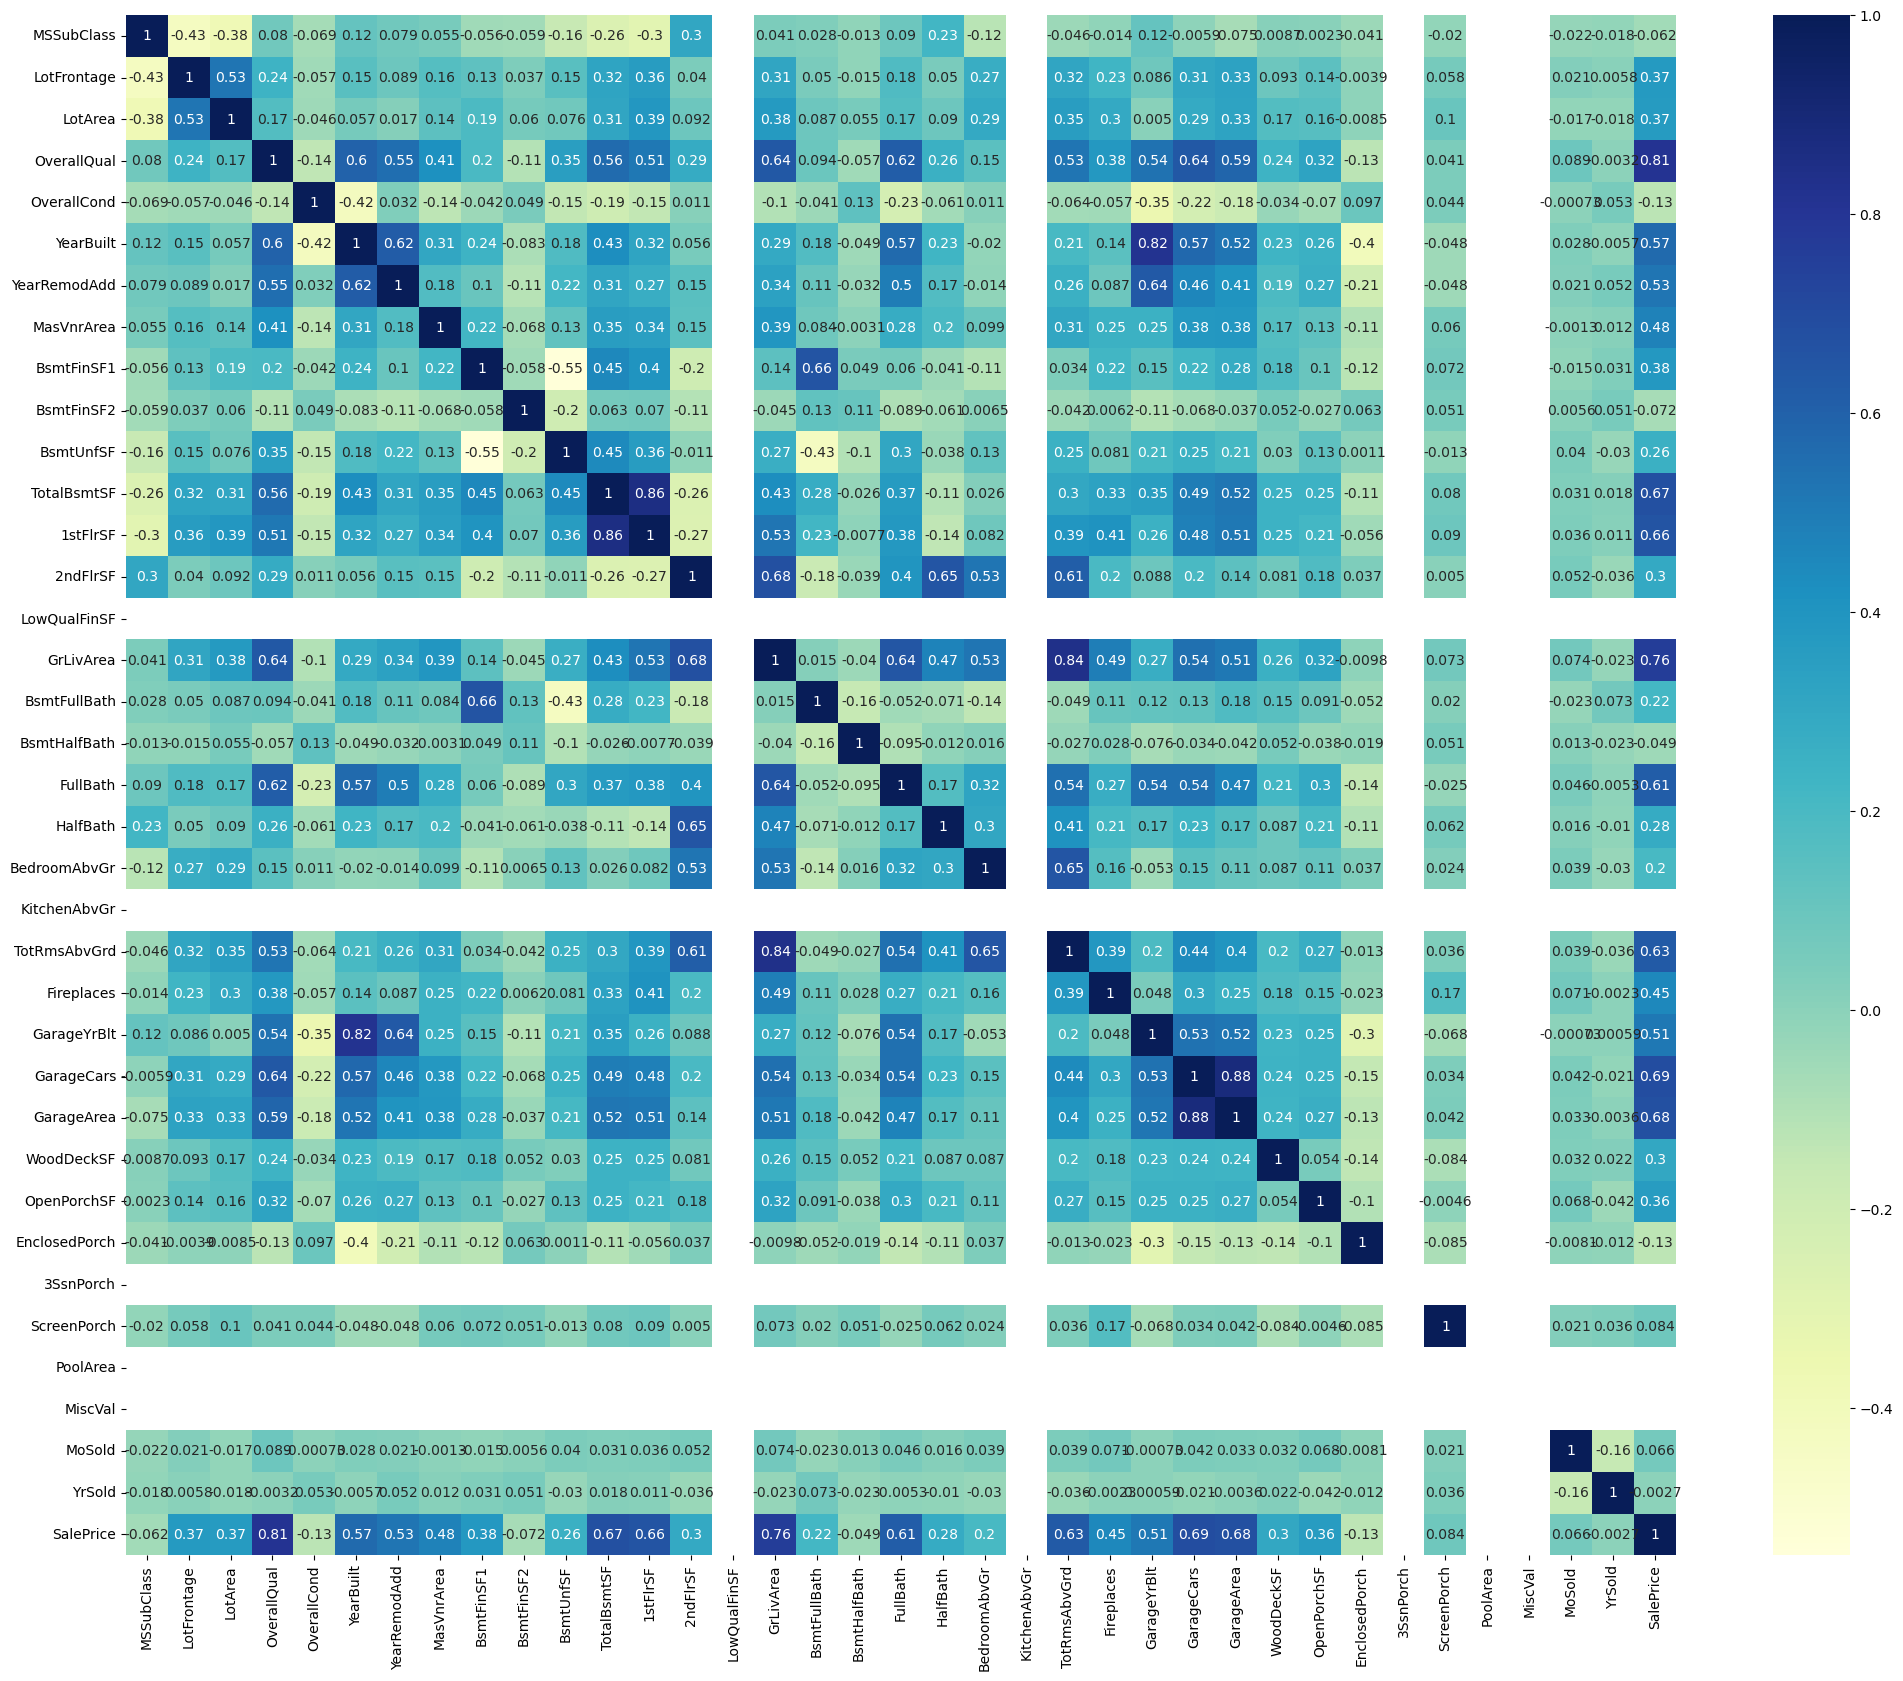

In [700]:
#Check the correlation between numeric variables
plt.figure(figsize = (25, 20))
sns.heatmap(HousePrice[Numeric_Columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

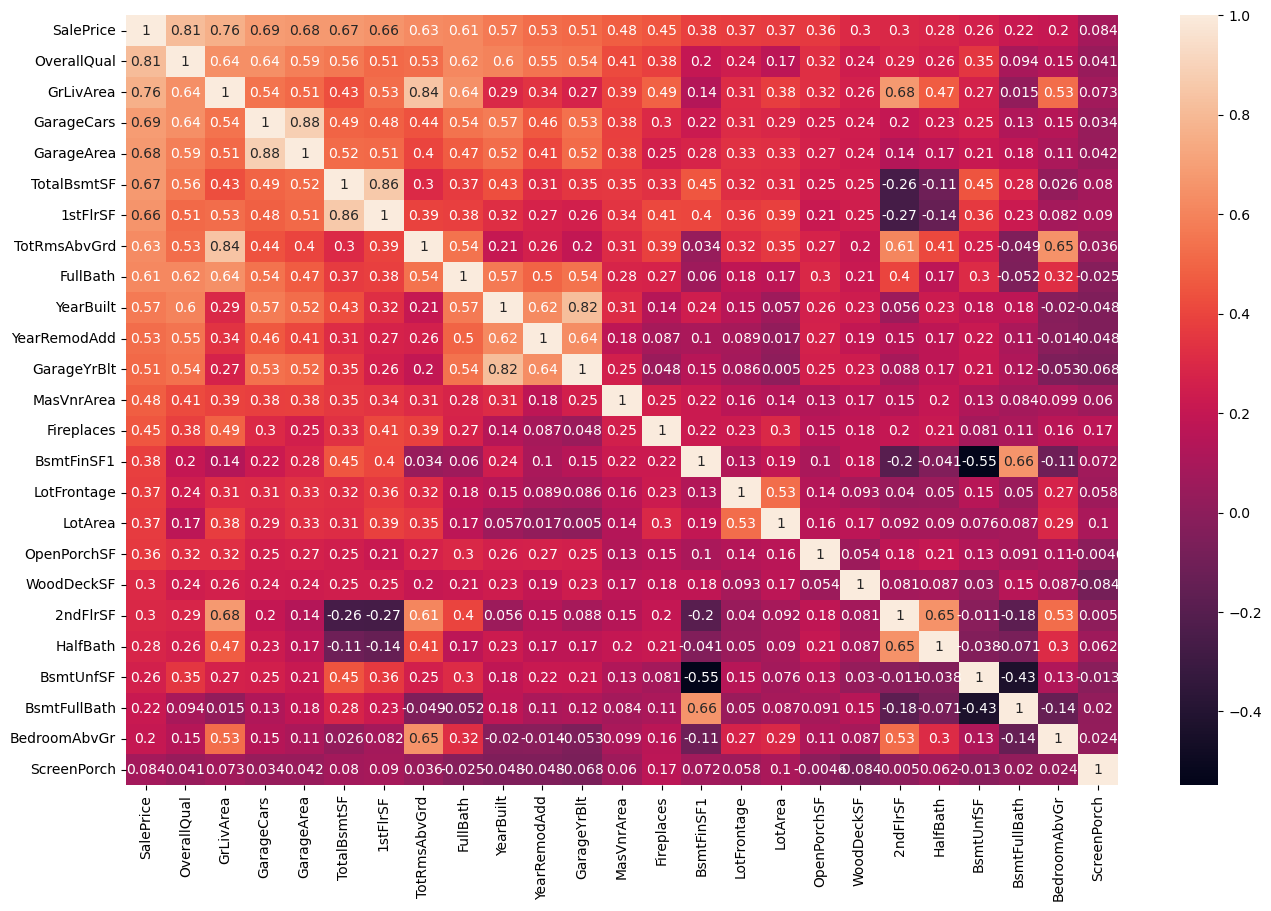

In [701]:
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = HousePrice[Numeric_Columns].corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(HousePrice[cols].corr(),annot=True)
plt.show()

In [702]:
HousePrice.shape

(1266, 75)

# Data Preparation

In [703]:
#Get dummies for Vategorical variables
HousePrice=pd.get_dummies(HousePrice,drop_first=True)
HousePrice.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [704]:
y = HousePrice.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [705]:
X = HousePrice
X.shape

(1266, 221)

In [706]:
#Split the Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [707]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (848, 221)
X_test shape (418, 221)
y_train shape (848,)
y_test shape (418,)


In [708]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.0,848.000000,848.0,848.0,848.000000,848.000000
mean,54.221698,69.180425,9605.031840,6.187500,5.568396,1974.272406,1986.636792,108.018868,440.716981,40.270047,...,484.596698,86.514151,45.902123,21.709906,0.0,15.492925,0.0,0.0,6.293632,2007.781840
std,40.365601,19.973932,4039.853226,1.383486,1.077862,29.529728,20.516821,178.286054,430.952190,138.177269,...,215.976266,112.082929,61.680661,59.748693,0.0,54.771307,0.0,0.0,2.664181,1.306889
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000
25%,20.000000,60.000000,7444.000000,5.000000,5.000000,1955.000000,1969.750000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000
50%,50.000000,69.000000,9434.500000,6.000000,5.000000,1977.000000,1996.000000,0.000000,395.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000
75%,60.000000,79.000000,11429.750000,7.000000,6.000000,2003.000000,2005.000000,174.000000,714.500000,0.000000,...,596.000000,164.500000,67.250000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,2188.000000,972.000000,...,1390.000000,576.000000,341.000000,386.000000,0.0,385.000000,0.0,0.0,12.000000,2010.000000


In [709]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [710]:
num_vars=X_train.select_dtypes(exclude='object').columns

In [711]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Model Building and Evaluation

### Linear Regression

In [712]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [713]:
#rfe = RFE(estimator=LinearRegression(), n_features_to_select=25)             # running RFE
#rfe = rfe.fit(X_train, y_train)

In [714]:
#col = X_train.columns[rfe.support_]
#col

In [715]:
#X_train1=X_train[col]
#X_test1=X_test[col]

In [716]:
#lm1=lm.fit(X_train1, y_train)

In [717]:
print(lm.intercept_)
print(lm.coef_)

8500543573662437.0
[-8.14298920e+03  1.29248137e+04  4.56721326e+04  5.68737346e+04
  4.83381330e+04  3.08179514e+04  2.72858055e+03  1.72333024e+04
  1.08157539e+16  4.80480474e+15  1.15473497e+16 -1.58479465e+16
 -7.05619457e+15 -5.00318320e+15 -7.60878788e+15  8.69365001e+15
 -2.68587500e+03 -3.76109375e+03  1.29652500e+04  3.68400000e+03
 -4.30812344e+04 -5.64080125e+15  3.63597500e+04  7.72273438e+02
  7.58625000e+03  2.13060625e+04  1.28260625e+04  1.00935000e+04
  6.49812500e+03  9.06137500e+03  3.20011502e+15  1.80584375e+04
 -2.95341885e+15 -1.14329095e+15 -3.81671875e+02 -2.69275000e+03
  6.29401250e+04  3.17901895e+04  4.23040000e+04  4.04790000e+04
 -7.25906250e+03 -2.43125000e+01 -4.19368750e+03 -4.21750000e+02
  3.85714062e+03 -2.09425625e+04 -2.58831250e+03 -2.94151250e+04
  2.51190625e+03 -6.75587500e+03 -3.01859453e+04 -9.21500000e+02
 -4.04906250e+02 -3.92432188e+04 -2.76359375e+02 -3.15093750e+02
 -1.04915000e+04 -1.58520312e+04 -9.33106250e+03  4.05350000e+03
 -2.21

In [718]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)



0.9447767303299869
-9.528481878414744e+19
279631468818.0
2.088080389915472e+32
329754090.5872642
4.9954076313767274e+29


# Ridge

In [719]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [720]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 4.0}
-16361.546552941993


In [721]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.30920446e+04,  1.59179186e+04,  2.21036038e+04,  4.82552360e+04,
        2.62725286e+04,  1.42534444e+04,  7.23008790e+03,  1.83078060e+04,
        3.86098912e+04,  3.64066401e+03,  1.00550560e+04,  3.47803426e+04,
        4.94537404e+04,  3.06527257e+04,  0.00000000e+00,  5.77796916e+04,
        9.74435582e+02, -2.03903051e+03,  1.95352342e+04,  7.96442690e+03,
       -1.19838574e+04,  0.00000000e+00,  3.51458388e+04,  1.05403390e+04,
        2.55720167e+03,  1.98283785e+04,  2.10176813e+04,  1.15343547e+04,
        9.03565558e+03,  4.29084379e+03,  0.00000000e+00,  1.03715562e+04,
        0.00000000e+00,  0.00000000e+00,  4.65409489e+02, -2.01598904e+03,
        1.24119362e+04, -9.54738331e+02,  6.24243031e+03,  1.90307553e+03,
        4.70895553e+03,  1.75244739e+03, -5.35270847e+02, -1.78550918e+03,
        6.77618389e+03, -1.18929052e+04,  2.76893459e+01, -5.23479322e+03,
        4.45037663e+03, -8.40603277e+03, -7.06059265e+03, -1.36107453e+03,
       -9.67129617e+02, -

In [722]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9350683856484576
0.923636746316711
328791156379.2306
167343145068.50327
387725420.2585266
400342452.3169935


# Lasso


In [723]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [724]:
print(model_cv.best_params_)

{'alpha': 100}


In [725]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [726]:
lasso.coef_

array([-1.98482515e+04,  1.22781419e+04,  1.26261673e+04,  7.61161944e+04,
        2.78041131e+04,  2.01200718e+04,  4.63875071e+03,  1.33544971e+04,
        3.83793878e+04,  0.00000000e+00,  0.00000000e+00,  2.81492449e+04,
        1.41438556e+04,  0.00000000e+00,  0.00000000e+00,  1.68818385e+05,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.20312639e+04,  0.00000000e+00,  2.48835986e+04,  3.55481987e+03,
        2.94897662e+03,  2.34209195e+04,  1.26781556e+04,  7.33893262e+03,
        5.16821718e+03,  0.00000000e+00,  0.00000000e+00,  6.55031802e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.83341399e+01,
        1.28901363e+04, -0.00000000e+00,  4.90423577e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.94574046e+03,
        2.67988859e+03, -7.65235200e+03,  0.00000000e+00, -0.00000000e+00,
        4.26337396e+03, -1.58340278e+03, -0.00000000e+00, -1.11472265e+02,
       -0.00000000e+00, -

In [727]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.931327246075532
0.9206658991027625
347734988573.18744
173853487311.93393
410064845.0155512
415917433.7606075


In [728]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.447767e-01,9.350684e-01,9.313272e-01
1,R2 Score (Test),-9.528482e+19,9.236367e-01,9.206659e-01
2,RSS (Train),2.796315e+11,3.287912e+11,3.477350e+11
3,RSS (Test),2.088080e+32,1.673431e+11,1.738535e+11
4,MSE (Train),1.815913e+04,1.969074e+04,2.025006e+04
5,MSE (Test),7.067820e+14,2.000856e+04,2.039405e+04


# Model Evaluation

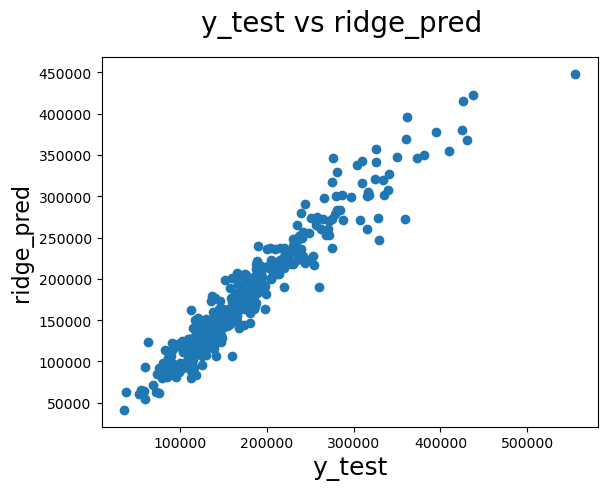

In [729]:
ridge_pred = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

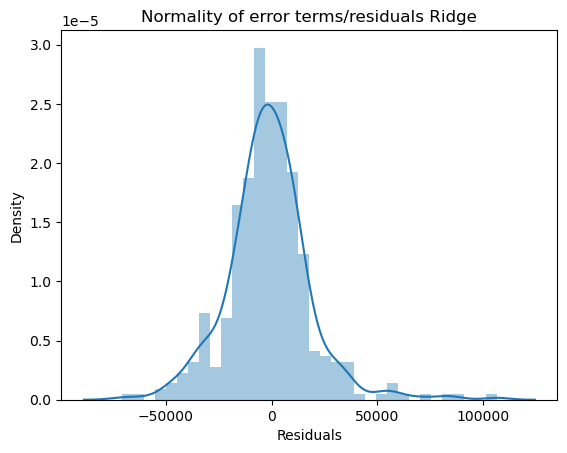

In [730]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

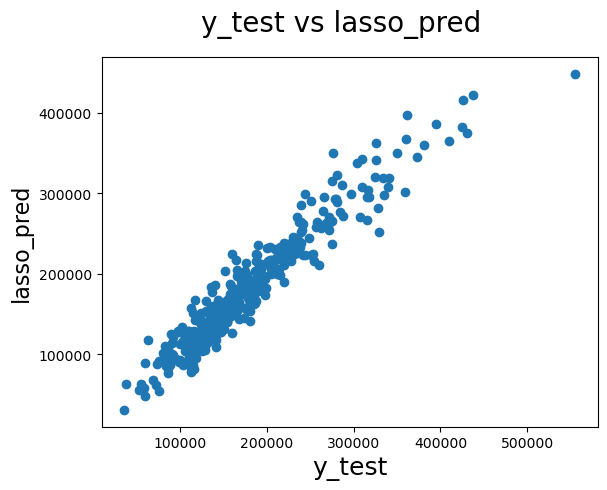

In [731]:
lasso_pred = lasso.predict(X_test)
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

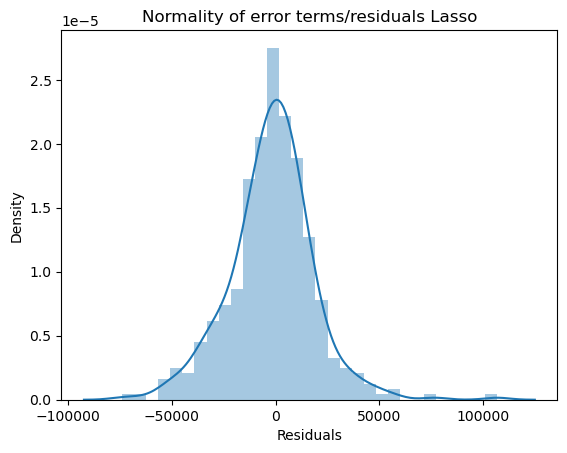

In [732]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

### Changes in Coefficients after regularisation 

In [733]:
betas = pd.DataFrame(index=X.columns)

In [734]:
betas.rows = X.columns

In [735]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [736]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-8.142989e+03,-13092.044641,-19848.251479
LotFrontage,1.292481e+04,15917.918556,12278.141933
LotArea,4.567213e+04,22103.603820,12626.167279
OverallQual,5.687373e+04,48255.235990,76116.194439
OverallCond,4.833813e+04,26272.528631,27804.113127
YearBuilt,3.081795e+04,14253.444395,20120.071790
YearRemodAdd,2.728581e+03,7230.087900,4638.750707
MasVnrArea,1.723330e+04,18307.806045,13354.497092
BsmtFinSF1,1.081575e+16,38609.891234,38379.387773
BsmtFinSF2,4.804805e+15,3640.664013,0.000000


### Below are the top 5 predictor variables:
         1.LotFrontage
         2.LotArea
         3.OverallQual
         4.OverallCond
         5.YearBuilt
         6.YearRemodAdd


# Assigment Part 2

#### Question 1:What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [737]:
alpha = 8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)
ridge2.coef_

array([-12693.01431271,  14553.50358066,  18042.4799872 ,  41706.31608543,
        19486.20355511,  10138.14752443,   8534.19351589,  18659.64287557,
        33259.28087296,   2075.7003179 ,  10674.67631759,  31105.71775949,
        42251.07113506,  25126.60653852,      0.        ,  48753.37672597,
         2501.67418834,  -1613.49943155,  19502.34864069,   8730.10384551,
        -4184.33076466,      0.        ,  32396.81324404,  13767.72831929,
         2160.93470112,  21111.01638165,  21797.90110622,  11733.18290033,
         9870.88924133,   3428.09375904,      0.        ,   8667.42858499,
            0.        ,      0.        ,   1017.02142542,  -1691.10146262,
         8157.00593385,  -1095.72323434,   5444.82158439,   -927.36660357,
         3248.34387641,   2320.4050165 ,   -102.21658636,  -2250.27666693,
         6665.30593321,  -9258.28694952,    667.50487647,  -3200.50672415,
         4853.94077024,  -8151.54301244,  -4123.32994958,  -1540.84238023,
         -725.3684829 , -

In [738]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9279995624053851
0.922395231502712
364585223591.9611
170063812190.48566
429935405.17919946
406851225.3360901


In [739]:
alpha =200

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 
lasso2.coef_

array([-18520.61567636,   7600.93423271,    970.91514123,  86721.10800095,
        16446.13954227,  11952.57743645,   7465.98665196,  12876.53031419,
        39770.18175266,      0.        ,      0.        ,  19171.63815017,
        21607.56356314,      0.        ,      0.        , 167670.07304883,
            0.        ,     -0.        ,      0.        ,      0.        ,
           -0.        ,      0.        ,  14540.1506531 ,   4445.97502355,
            0.        ,  23602.35163135,  15732.10246006,   5128.07182327,
         3301.49169376,     -0.        ,      0.        ,   1747.46074868,
            0.        ,      0.        ,      0.        ,     -0.        ,
         3063.71828359,     -0.        ,      0.        ,  -5141.86554362,
            0.        ,      0.        ,     -0.        ,  -2402.76642572,
            0.        ,   -857.51922477,      0.        ,     -0.        ,
         3972.9361518 ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,  

In [740]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9226205335346922
0.9147643352956378
391822758654.885
186786229182.81635
462055139.9232135
446857007.6143932


In [741]:
#important predictor variables
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso2
MSSubClass,-12693.014313,-13092.044641,-19848.251479,-18520.615676
LotFrontage,14553.503581,15917.918556,12278.141933,7600.934233
LotArea,18042.479987,22103.603820,12626.167279,970.915141
OverallQual,41706.316085,48255.235990,76116.194439,86721.108001
OverallCond,19486.203555,26272.528631,27804.113127,16446.139542
YearBuilt,10138.147524,14253.444395,20120.071790,11952.577436
YearRemodAdd,8534.193516,7230.087900,4638.750707,7465.986652
MasVnrArea,18659.642876,18307.806045,13354.497092,12876.530314
BsmtFinSF1,33259.280873,38609.891234,38379.387773,39770.181753
BsmtFinSF2,2075.700318,3640.664013,0.000000,0.000000


##  Answer               
                 Optimal value for ridge is alpha=4
                 Optimal value for Lasso is alpha=100
                 If we double the alpha the R2 Score slightly reduces both train  and test data for both ridge & Lasso
                 Most Important Predictor variables are :
                  1.LotFrontage
                  2.LotArea
                  3.OverallQual
                  4.OverallCond
                  5.YearBuilt
                  6.YearRemodAdd



#### Question 3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [742]:
X_train2 = X_train.drop(['LotFrontage','LotArea','OverallQual','YearBuilt','OverallCond'],axis=1)
X_test2 = X_test.drop(['LotFrontage','LotArea','OverallQual','YearBuilt','OverallCond'],axis=1)

In [743]:
alpha =100
lasso3 = Lasso(alpha=alpha)
lasso3.fit(X_train2, y_train) 

Lasso(alpha=100)

In [744]:
y_pred_train = lasso3.predict(X_train2)
y_pred_test = lasso3.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.924835157377114
0.9123898489734997
380608672244.6405
191989700615.7746
448830981.4205666
459305503.8654895


In [745]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train2.columns
betas['Lasso3'] = lasso3.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso3
MSSubClass,-22280.067709
YearRemodAdd,10801.278004
MasVnrArea,16304.020158
BsmtFinSF1,33800.136196
BsmtFinSF2,0.000000
BsmtUnfSF,0.000000
TotalBsmtSF,36599.167668
1stFlrSF,14353.426528
2ndFlrSF,0.000000
LowQualFinSF,0.000000


### Answer
        Below are the important predictors now:
         1.YearRemodAdd
         2.MasVnrArea
         3.BsmtFinSF1
         4.BsmtFinSF2
         5.BsmtUnfSF
